<a href="https://colab.research.google.com/github/Nniikkoollaass/data-science-modul-5-HW/blob/main/Hw2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'

table = pd.read_html(url, match='Коефіцієнт народжуваності в регіонах України', decimal=',', thousands='.')
#Вивести перші рядки таблиці за допомогою методу head
df = table[0].head()
df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—


In [4]:
#Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
df.shape

(5, 9)

In [7]:
#Замініть у таблиці значення "—" на значення NaN
# Replace '—' with NaN
# Create a copy of the DataFrame
df_copy = df.copy()

# Replace '—' with NaN in the copied DataFrame
df_copy.replace('—', float('NaN'), inplace=True)
df_copy

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN


In [9]:
#Визначте типи всіх стовпців за допомогою dataframe.dtypes
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

In [11]:
#Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
# Змінємо тип на числовий
df_copy.astype({'2014': 'float64', '2019': 'float64'}).dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object

In [12]:
#Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN


In [14]:
# Пораховуємо кількість пропусків у кожному стовпці
missing_values = df.isnull().sum()

# Знаходимо загальну кількість елементів у кожному стовпці
total_values = len(df)

# Розраховуємо частку пропусків у кожному стовпці
missing_percentage = (missing_values / total_values) * 100

print("Частка пропусків у кожній колонці:")
missing_percentage

Частка пропусків у кожній колонці:


Регіон     0.0
1950       0.0
1960       0.0
1970       0.0
1990       0.0
2000       0.0
2012       0.0
2014      20.0
2019      40.0
dtype: float64

In [16]:
#Видаліть з таблиці дані по всій країні, останній рядок таблиці
table[0]

table[0].drop(27)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


In [17]:
#Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
new_df_two = df.head()

new_df_two.replace('—', np.nan, inplace=True)
new_df_two = new_df_two.apply(pd.to_numeric, errors='coerce')

mean_values = new_df_two.mean()
new_df_two.fillna(mean_values, inplace=True)
new_df_two

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,NaN,23.0,20.6,16.0,13.0,7.3,12.6,11.075,8.266667
1,NaN,22.4,19.2,14.2,12.4,8.4,11.2,10.900,7.600000
2,NaN,24.7,25.0,17.9,15.3,11.2,14.8,14.100,10.100000
3,NaN,20.4,20.4,15.1,12.3,7.1,11.2,11.100,7.100000
4,NaN,27.1,21.4,14.0,10.9,6.1,9.8,8.200,8.266667


In [18]:
# Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
# Вибираємо стовпець з роком 2019 та стовпець з середнім значенням
df_2019 = df.iloc[:, [0, -1]]  # Використовуємо індекси стовпців

# Змінюємо тип даних стовпця "2019" на числовий
df_2019.iloc[:, -1] = df_2019.iloc[:, -1].str.replace(',', '.').astype(float)

# Розраховуємо середнє значення рівня народжуваності по Україні
mean_birth_rate = df_2019.iloc[:, -1].mean()

# Відбираємо регіони, де рівень народжуваності у 2019 році був вищим за середній по Україні
regions_higher_than_mean = df_2019[df_2019.iloc[:, -1] > mean_birth_rate]

regions_higher_than_mean

,Регіон,2019
2,Волинська,10.1


In [14]:
# У якому регіоні була найвища народжуваність у 2014 році?
# Вибираємо стовпець з регіонами та стовпець з рівнями народжуваності у 2014 році
df_2014 = df[['Регіон', '2014']]

# Замінюємо коми на крапки та змінюємо тип даних на числовий
df_2014.loc[:, '2014'] = df_2014['2014'].str.replace(',', '.').astype(float)

# Знаходимо регіон з найвищим рівнем народжуваності у 2014 році
highest_birth_rate_region_2014 = df_2014[df_2014['2014'] == df_2014['2014'].max()]['Регіон'].values[0]

print("Найвища народжуваність у 2014 році була в регіоні:", highest_birth_rate_region_2014)

Найвища народжуваність у 2014 році була в регіоні: Волинська


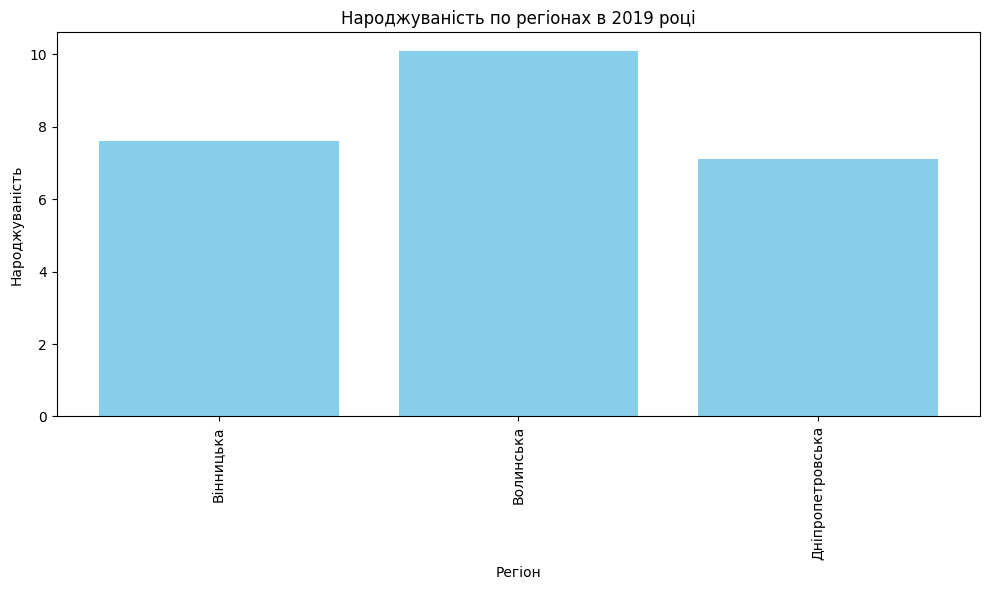

In [15]:
# Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році
# Вибираємо стовпець з регіонами та стовпець з народжуваністю у 2019 році
df_2019 = df[['Регіон', '2019']]

# Замінюємо коми на крапки та змінюємо тип даних на числовий
df_2019.loc[:, '2019'] = df_2019['2019'].str.replace(',', '.').astype(float)

# Створюємо стовпчикову діаграму
plt.figure(figsize=(10, 6))
plt.bar(df_2019['Регіон'], df_2019['2019'], color='skyblue')
plt.title('Народжуваність по регіонах в 2019 році')
plt.xlabel('Регіон')
plt.ylabel('Народжуваність')
plt.xticks(rotation=90)  # Повертаємо назви регіонів для зручності
plt.tight_layout()
plt.show()

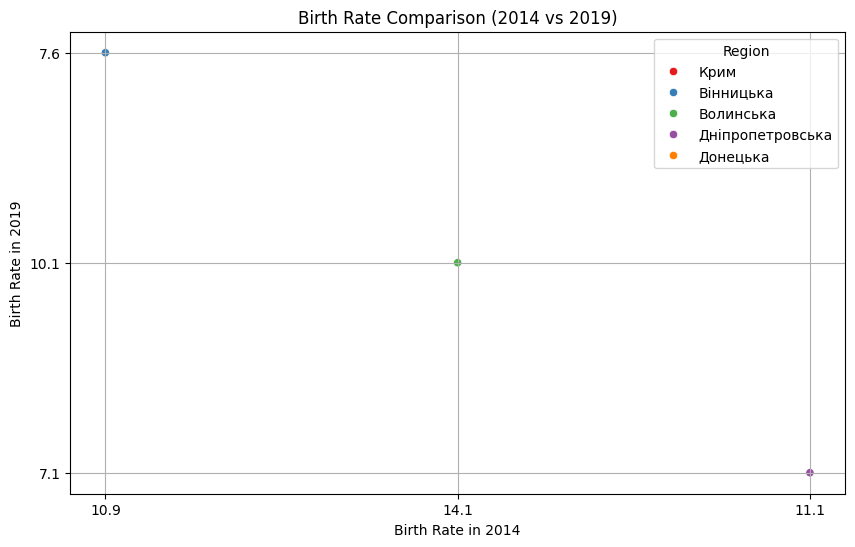

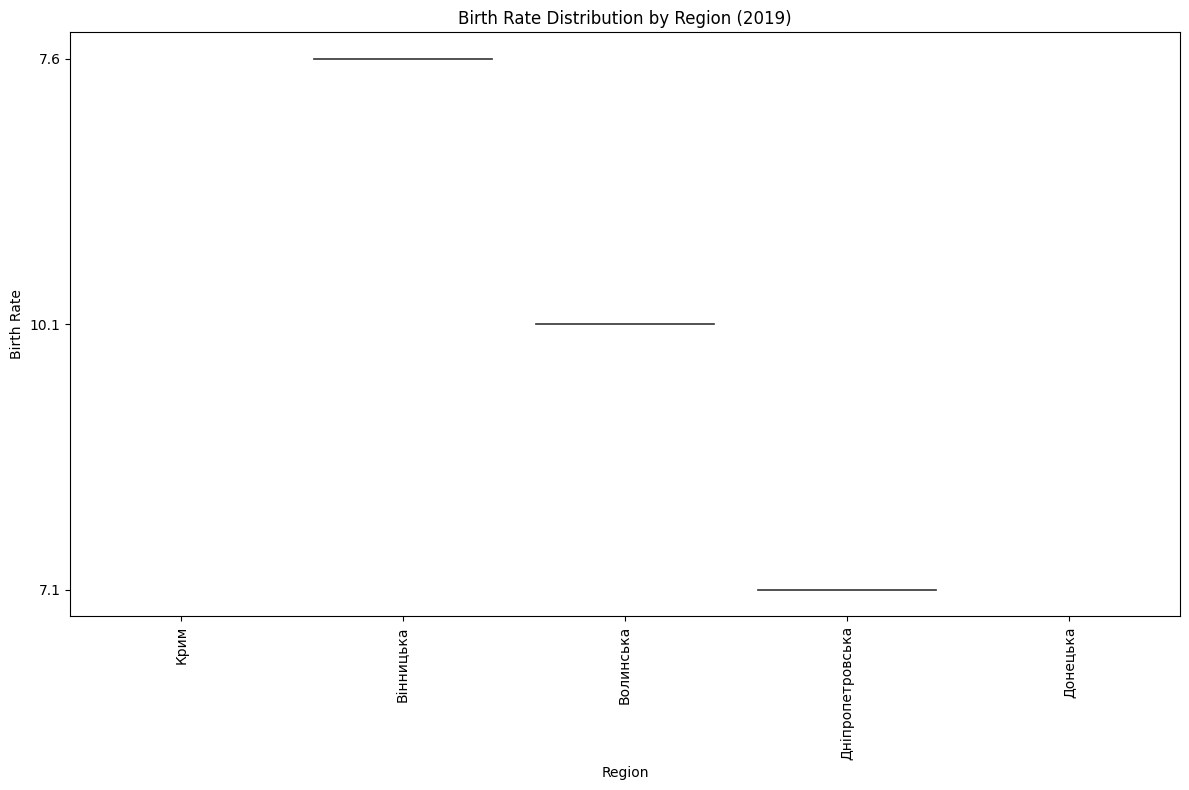

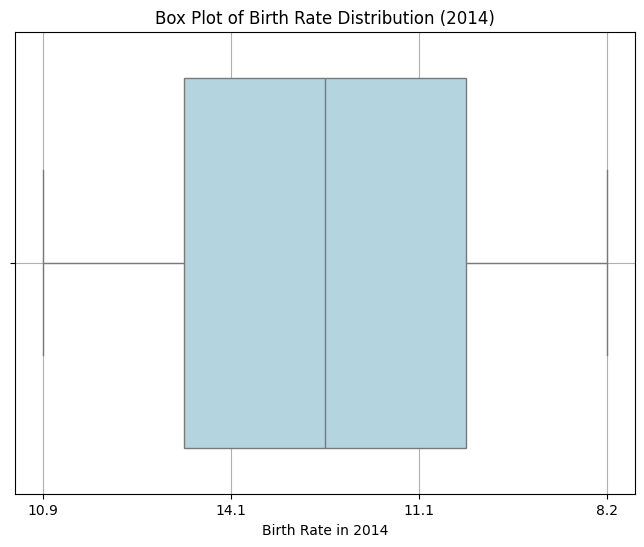

In [21]:
import seaborn as sns

# Plot 1: Scatter plot showing the relationship between birth rate in 2014 and 2019
plt.figure(figsize=(10, 6))
sns.scatterplot(x='2014', y='2019', data=df, hue='Регіон', palette='Set1')
plt.title('Birth Rate Comparison (2014 vs 2019)')
plt.xlabel('Birth Rate in 2014')
plt.ylabel('Birth Rate in 2019')
plt.legend(title='Region')
plt.grid(True)
plt.show()

# Plot 2: Violin plot showing birth rate distribution in different regions in 2019
plt.figure(figsize=(12, 8))
sns.violinplot(x='Регіон', y='2019', data=df, inner='quartile', hue='Регіон')
plt.title('Birth Rate Distribution by Region (2019)')
plt.xlabel('Region')
plt.ylabel('Birth Rate')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot 3: Box plot of birth rate distribution in 2014
plt.figure(figsize=(8, 6))
sns.boxplot(x='2014', data=df, color='lightblue')
plt.title('Box Plot of Birth Rate Distribution (2014)')
plt.xlabel('Birth Rate in 2014')
plt.grid(True)
plt.show()